In [2]:
# Here we are read the data 

import skimage
from skimage import io

coll= io.ImageCollection(r'C:\Users\ASUS ROG\Study Python\Image Recognation and Deep Machine Learning\Project2\data_el\*.tif')
coll.files

['C:\\Users\\ASUS ROG\\Study Python\\Image Recognation and Deep Machine Learning\\Project2\\data_el\\LC08_L1TP_201029_20190920_20190926_01_T1_B1.TIF',
 'C:\\Users\\ASUS ROG\\Study Python\\Image Recognation and Deep Machine Learning\\Project2\\data_el\\LC08_L1TP_201029_20190920_20190926_01_T1_B2.TIF',
 'C:\\Users\\ASUS ROG\\Study Python\\Image Recognation and Deep Machine Learning\\Project2\\data_el\\LC08_L1TP_201029_20190920_20190926_01_T1_B3.TIF',
 'C:\\Users\\ASUS ROG\\Study Python\\Image Recognation and Deep Machine Learning\\Project2\\data_el\\LC08_L1TP_201029_20190920_20190926_01_T1_B4.TIF']

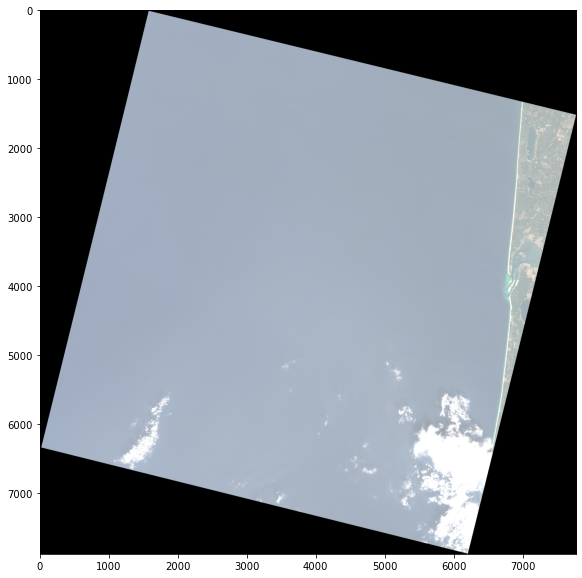

In [3]:
# display an  image
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure

# color composition
im_comp = np.dstack([coll[3]/coll[3].max(), coll[2]/coll[2].max(), coll[1]/coll[1].max()]) 

#instagram equalization
for i in range(3):
    v_min, v_max = np.percentile(im_comp[:,:,i],(2,98))
    im_comp[:,:,i] = exposure.rescale_intensity(im_comp[:,:,i],in_range=(v_min,v_max))
im_comp.shape 
plt.figure(figsize=(20,10))
plt.imshow(im_comp)
io.show()

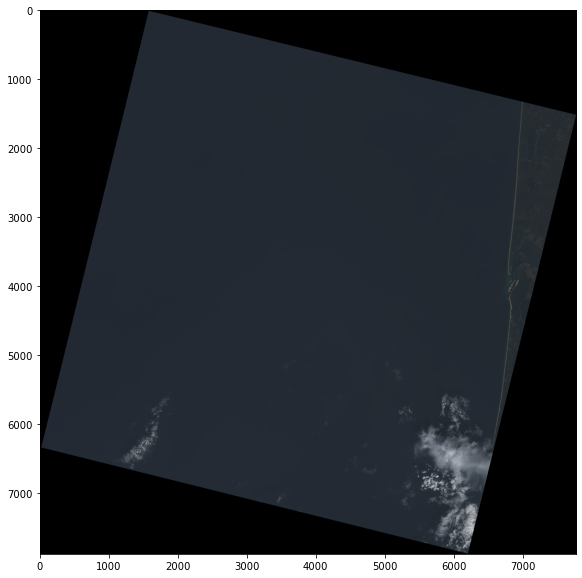

In [4]:
# display an  image
import numpy as np
from matplotlib import pyplot as plt

# color composition
im_comp = np.dstack([coll[3]/coll[3].max(), coll[2]/coll[2].max(), coll[1]/coll[1].max()]) 

plt.figure(figsize=(20,10))
plt.imshow(im_comp)
io.show()

In [5]:
#step 1: transformation from 2d array to vectors

X1 = coll[3].flatten()
X2 = coll[2].flatten()
X3 = coll[1].flatten()

print(coll[3].shape)
print(X1.shape)

# step 2 : stacking vector into 2d array
X = np.stack([X1,X2,X3]).T

print(X.shape)

(7881, 7771)
(61243251,)
(61243251, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

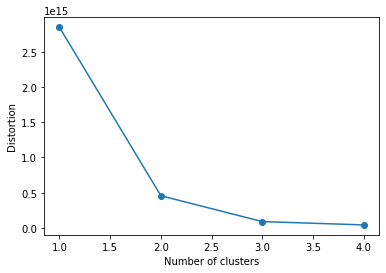

In [11]:
# calculate distortion for a range of number of cluster
import numpy
import matplotlib.pyplot as plt
import pandas as pd

X_pandas = pd.DataFrame(X)
X_pandas

distortions = []
for i in range(1,5):
    cluster = KMeans(n_clusters = i )
    cluster.fit(X_pandas)
    distortions.append(cluster.inertia_)
    
# plot
plt.plot(range(1,5),distortions,marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show

In [6]:
# clustering of pixels using K Means Method
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 2, algorithm = "full")

Y = kmeans.fit_predict(X)

print(Y)

[1 1 1 ... 1 1 1]


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


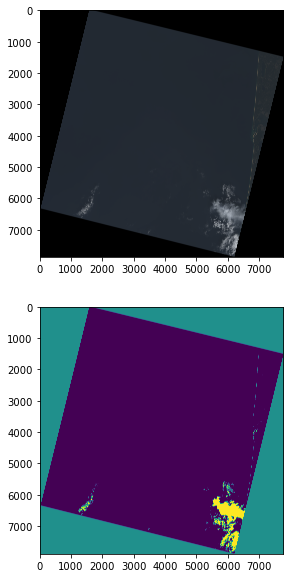

In [7]:
# Displaying result of clustering

Y_im = Y.reshape(coll[0].shape)
print(Y_im)
fig, arr = plt.subplots(2,1,figsize=(20,10))
arr[0].imshow(im_comp)
arr[1].imshow(Y_im)

In [12]:
# clustering of pixels using GaussianMixture Method

import numpy as np
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=0).fit(X)
Y = gm.predict(X)


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


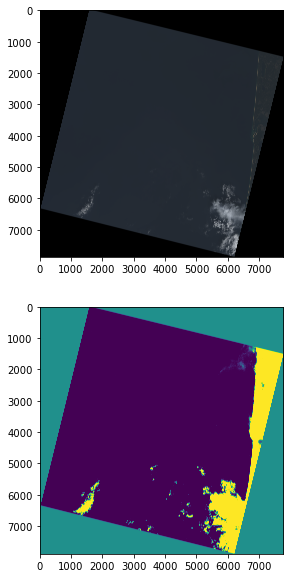

In [13]:
# Displaying result of clustering

Y_im = Y.reshape(coll[0].shape)
print(Y_im)
fig, arr = plt.subplots(2,1,figsize=(20,10))
arr[0].imshow(im_comp)
arr[1].imshow(Y_im)